In [68]:

import pandas as pd

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import matplotlib.pyplot as plt

Load data

In [71]:
df = pd.read_csv("/content/drive/MyDrive/cleaned_aapl_data.csv")

Convert to datetime and set index

In [72]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

In [73]:
print(df.info())
print(df.describe())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 1980-12-12 to 2020-08-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   10000 non-null  float64
 1   High    10000 non-null  float64
 2   Low     10000 non-null  float64
 3   Open    10000 non-null  float64
 4   Volume  10000 non-null  float64
dtypes: float64(5)
memory usage: 468.8 KB
None
              Close          High           Low          Open        Volume
count  10000.000000  10000.000000  10000.000000  10000.000000  1.000000e+04
mean       8.080586      8.159776      7.993704      8.075465  3.415299e+08
std       15.437278     15.584023     15.265463     15.413767  3.428621e+08
min        0.037724      0.038153      0.037724      0.038153  0.000000e+00
25%        0.223584      0.228092      0.218644      0.223302  1.315009e+08
50%        0.358069      0.364766      0.351082      0.357732  2.288338e+08
75%        8.088333      8.143859    

Plot closing price


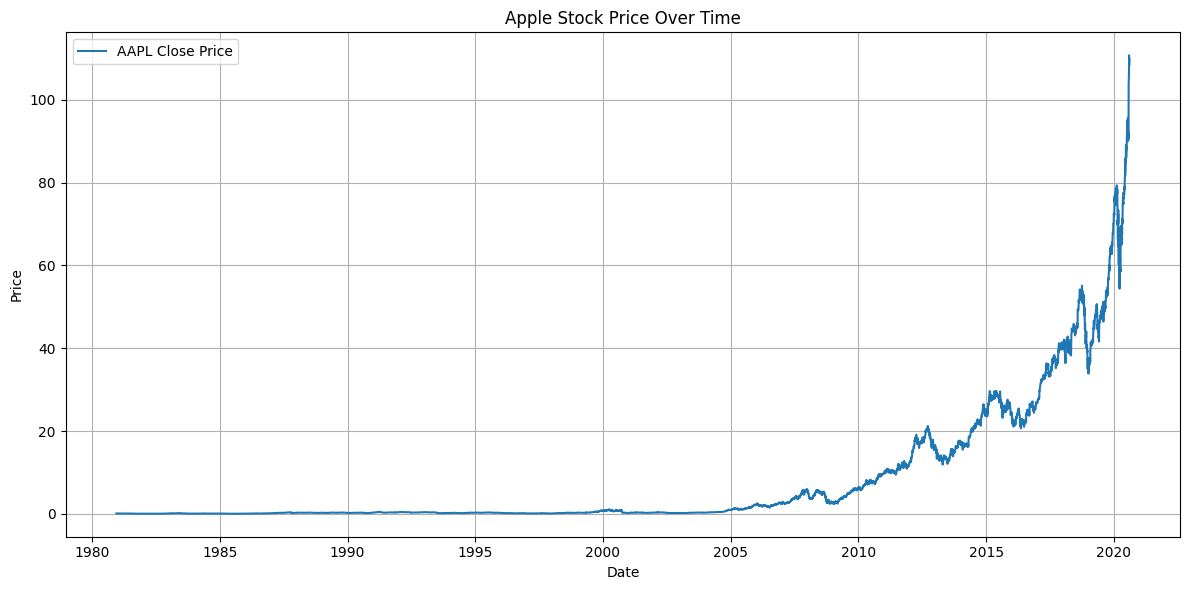

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='AAPL Close Price')
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

STEP 2 Arima

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [76]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_aapl_data.csv')

In [77]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1980-12-12,0.098597,0.099025,0.098597,0.098597,469033600.0
1,1980-12-15,0.093453,0.093881,0.093453,0.093881,175884800.0
2,1980-12-16,0.086594,0.087022,0.086594,0.087022,105728000.0
3,1980-12-17,0.088737,0.089165,0.088737,0.088737,86441600.0
4,1980-12-18,0.091310,0.091738,0.091310,0.091310,73449600.0


In [78]:
df.tail()

,Date,Close,High,Low,Open,Volume
9995,2020-08-04,106.601959,107.695537,105.360137,106.084331,173071600.0
9996,2020-08-05,106.988358,107.309142,105.855896,106.322493,121776800.0
9997,2020-08-06,110.721107,111.216865,106.730768,107.321298,202428800.0
9998,2020-08-07,108.203773,110.699192,107.405240,110.241494,198045600.0
9999,2020-08-10,109.776489,110.796568,107.120390,109.652325,212403600.0


In [79]:
df.set_index('Date',inplace= True)

In [80]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098597,0.099025,0.098597,0.098597,469033600.0
1980-12-15,0.093453,0.093881,0.093453,0.093881,175884800.0
1980-12-16,0.086594,0.087022,0.086594,0.087022,105728000.0
1980-12-17,0.088737,0.089165,0.088737,0.088737,86441600.0
1980-12-18,0.091310,0.091738,0.091310,0.091310,73449600.0


In [81]:
df.describe()

,Close,High,Low,Open,Volume
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,8.080586,8.159776,7.993704,8.075465,3.415299e+08
std,15.437278,15.584023,15.265463,15.413767,3.428621e+08
min,0.037724,0.038153,0.037724,0.038153,0.000000e+00
25%,0.223584,0.228092,0.218644,0.223302,1.315009e+08
50%,0.358069,0.364766,0.351082,0.357732,2.288338e+08
75%,8.088333,8.143859,8.030780,8.099529,4.256994e+08
max,110.721107,111.216865,107.405240,110.241494,7.421641e+09


<Axes: xlabel='Date'>

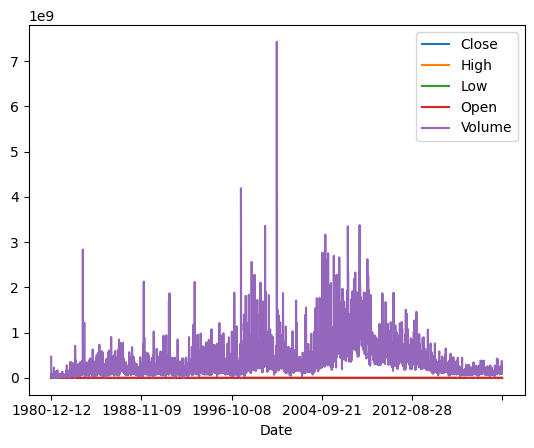

In [82]:
df.plot()

In [83]:
print(df.dtypes)

Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object


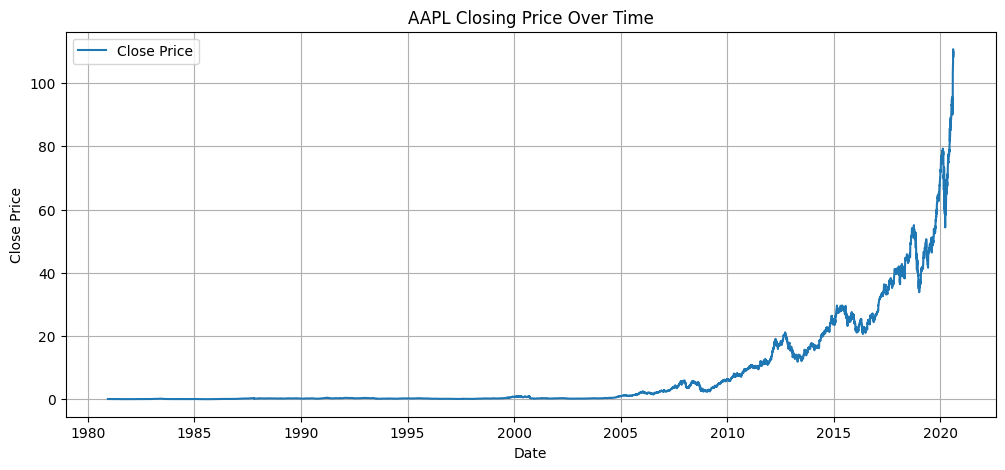

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/cleaned_aapl_data.csv")

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

In [86]:
test_result=adfuller(df['Close'])

In [87]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(Close):
    result = adfuller(Close)
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']

    for value, label in zip(result[:4], labels):
        print(f"{label} : {value}")

    if result[1] <= 0.05:
        print("✅ The data is **stationary** (p-value ≤ 0.05)")
    else:
        print("❌ The data is **not stationary** (p-value > 0.05)")

In [88]:
# Run ADF test
test_result = adfuller(df['Close'])

# Display results
labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
for value, label in zip(test_result[:4], labels):
    print(f"{label} : {value}")

# Interpretation
if test_result[1] <= 0.05:
    print("✅ The data is **stationary** (p-value ≤ 0.05)")
else:
    print("❌ The data is **not stationary** (p-value > 0.05)")

ADF Test Statistic : 6.904269335652636
p-value : 1.0
# Lags Used : 38
Number of Observations Used : 9961
❌ The data is **not stationary** (p-value > 0.05)


In [89]:
df['Close_diff'] = df['Close'].diff()

In [90]:
diff_result = adfuller(df['Close_diff'].dropna())

labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
for value, label in zip(diff_result[:4], labels):
    print(f"{label} : {value}")

if diff_result[1] <= 0.05:
    print("✅ The differenced data is stationary.")
else:
    print("❌ The differenced data is still not stationary.")

ADF Test Statistic : -11.855571377604237
p-value : 7.041328038207354e-22
# Lags Used : 38
Number of Observations Used : 9960
✅ The differenced data is stationary.


In [91]:
from statsmodels.tsa.arima.model import ARIMA

# Create and fit ARIMA model
model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                10000
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3900.073
Date:                Wed, 06 Aug 2025   AIC                           7812.146
Time:                        15:17:17   BIC                           7855.407
Sample:                             0   HQIC                          7826.790
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1391      0.002    -82.657      0.000      -0.142      -0.136
ar.L2          0.0524      0.002     30.475      0.000       0.049       0.056
ar.L3          0.0182      0.002      8.546      0.0

In [92]:
# Forecast next 30 time steps
forecast = model_fit.forecast(steps=30)
print(forecast)

10000    109.557338
10001    109.778059
10002    109.946067
10003    109.803588
10004    109.941142
10005    109.909404
10006    109.939869
10007    109.943659
10008    109.938619
10009    109.948825
10010    109.945972
10011    109.949116
10012    109.948815
10013    109.948954
10014    109.949609
10015    109.949422
10016    109.949699
10017    109.949646
10018    109.949697
10019    109.949732
10020    109.949725
10021    109.949747
10022    109.949742
10023    109.949749
10024    109.949750
10025    109.949750
10026    109.949752
10027    109.949752
10028    109.949752
10029    109.949752
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


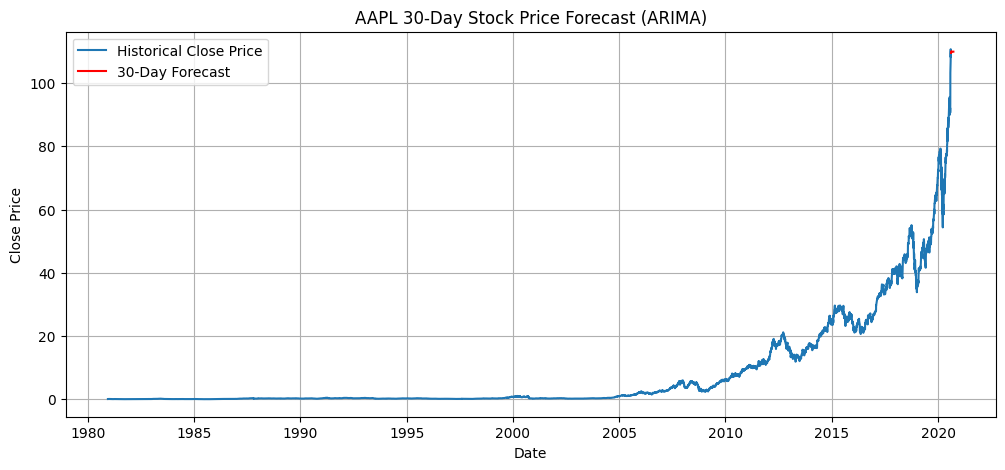

In [93]:
import matplotlib.pyplot as plt

# Get the last date from your dataset
last_date = df.index[-1]

# Generate future dates (business days)
forecast_index = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Plot historical data and forecast
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Historical Close Price')
plt.plot(forecast_index, forecast, label='30-Day Forecast', color='red')
plt.title('AAPL 30-Day Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

STEP 3 Prophet Model

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [95]:
# Load and prepare data
df = pd.read_csv("/content/drive/MyDrive/cleaned_aapl_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

In [96]:
# Train the Prophet model
model = Prophet()
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4oeie3aj/6nhgsyg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4oeie3aj/0yvpq0fx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44483', 'data', 'file=/tmp/tmp4oeie3aj/6nhgsyg3.json', 'init=/tmp/tmp4oeie3aj/0yvpq0fx.json', 'output', 'file=/tmp/tmp4oeie3aj/prophet_modeljl60dx4a/prophet_model-20250806151720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [97]:
# Make future dataframe and predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

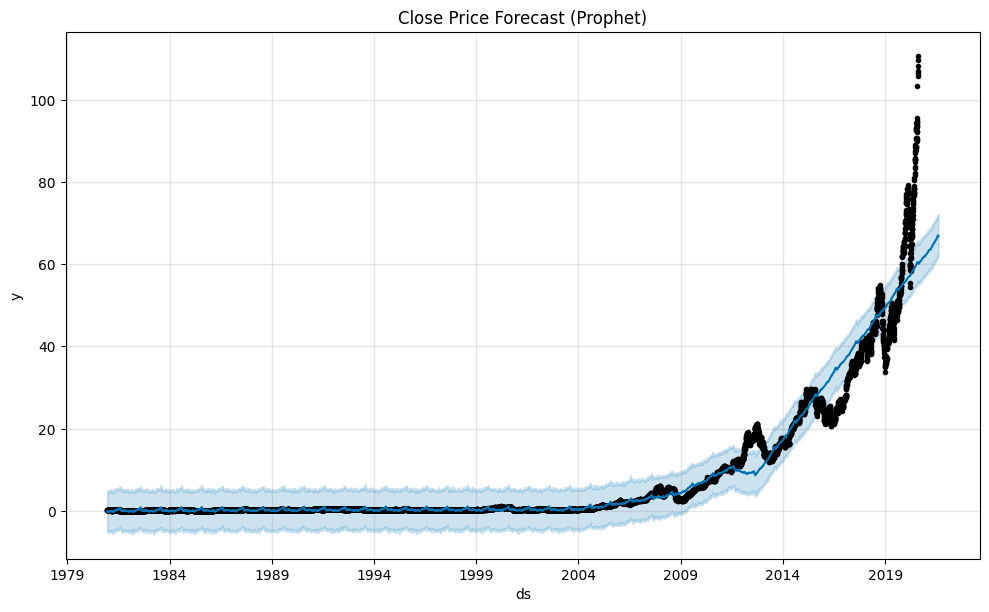

In [98]:
# Plot forecast
model.plot(forecast)
plt.title("Close Price Forecast (Prophet)")
plt.show()

# ***Sarima Forecast***


# New Section

In [99]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

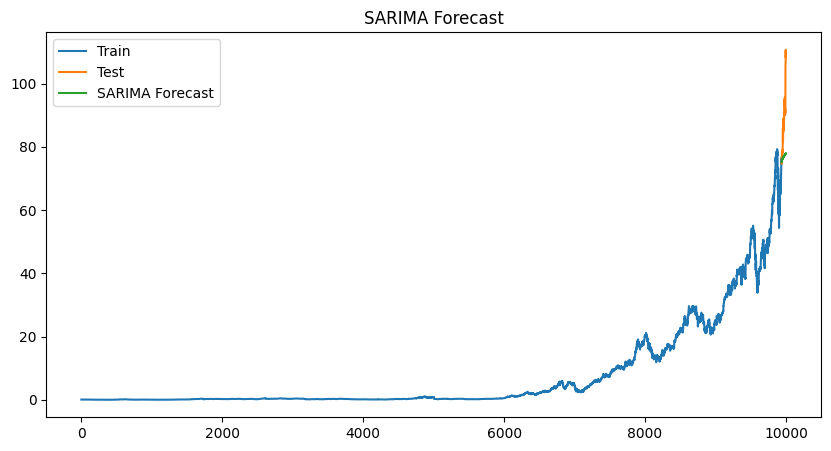

In [100]:
train = df.iloc[:-60]
test = df.iloc[-60:]

sarima_model = SARIMAX(train['y'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.forecast(steps=60)

plt.figure(figsize=(10,5))
plt.plot(train.index, train['y'], label='Train')
plt.plot(test.index, test['y'], label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

Plot Forecast Confidence Intervals

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


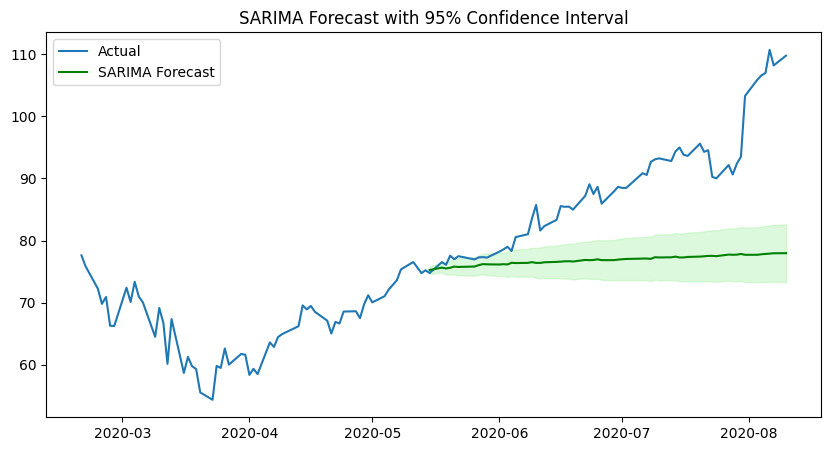

In [102]:
df = pd.read_csv("/content/drive/MyDrive/cleaned_aapl_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

train = df.iloc[:-60]
test = df.iloc[-60:]

sarima_model = SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

sarima_forecast_full = sarima_result.get_forecast(steps=60)
conf_int = sarima_forecast_full.conf_int()

plt.figure(figsize=(10,5))
plt.plot(df.index[-120:], df['Close'][-120:], label='Actual')
plt.plot(test.index, sarima_forecast_full.predicted_mean, label='SARIMA Forecast', color='green')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title('SARIMA Forecast with 95% Confidence Interval')
plt.legend()
plt.show()

 Calculate Forecast Accuracy (MAPE / RMSE)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [104]:
true = test['Close'].values
predicted = sarima_forecast_full.predicted_mean.values

mse = mean_squared_error(true, predicted)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((true - predicted) / true)) * 100

print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

RMSE: 14.38
MAPE: 12.31%


Decompose Time Series for Trend and Seasonality

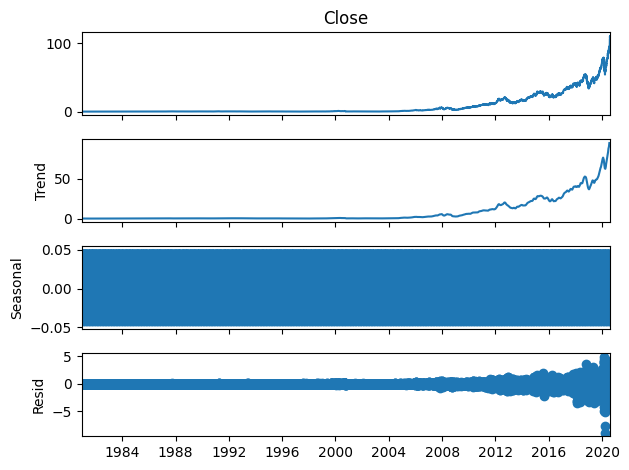

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=30)
result.plot()
plt.show()


Forecast Further Ahead (120 or 180 days)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


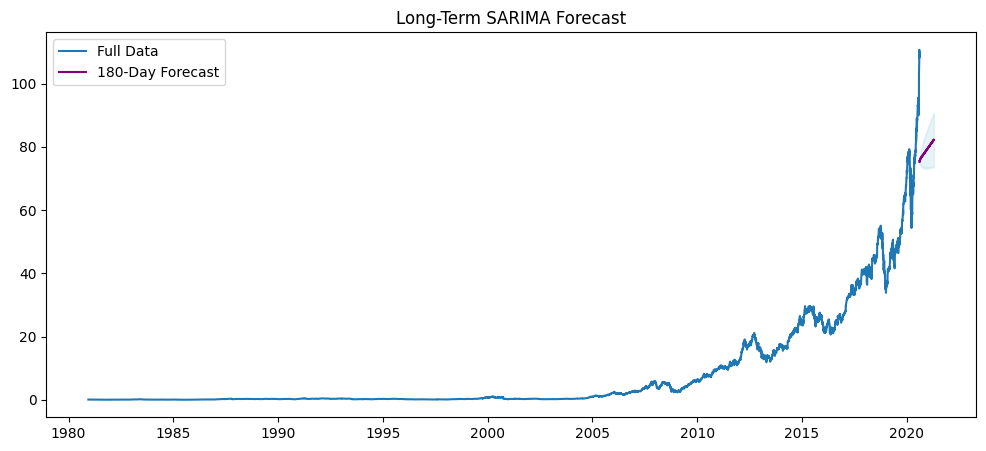

In [106]:
long_forecast = sarima_result.get_forecast(steps=180)
long_conf_int = long_forecast.conf_int()

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Full Data')
plt.plot(pd.date_range(start=test.index[-1], periods=180, freq='B'),
         long_forecast.predicted_mean, label='180-Day Forecast', color='purple')
plt.fill_between(pd.date_range(start=test.index[-1], periods=180, freq='B'),
                 long_conf_int.iloc[:, 0], long_conf_int.iloc[:, 1], alpha=0.3, color='lightblue')
plt.title('Long-Term SARIMA Forecast')
plt.legend()
plt.show()


Export To CSV

In [107]:
sarima_forecast_full.predicted_mean.to_csv("sarima_forecast.csv")


In [108]:
from google.colab import files
files.download("sarima_forecast.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LSTM MODEL

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error


In [110]:
df = pd.read_csv("/content/drive/MyDrive/cleaned_aapl_data.csv")

In [111]:
df = pd.read_csv("/content/drive/MyDrive/cleaned_aapl_data.csv")
from sklearn.preprocessing import MinMaxScaler

# Use Close price from the existing DataFrame
data = df.filter(['Close'])
dataset = data.values

print("✅ Filtered dataset shape:", dataset.shape)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("✅ Data scaled successfully!")

✅ Filtered dataset shape: (10000, 1)
✅ Data scaled successfully!


In [112]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/cleaned_aapl_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check columns
print("📋 Columns in your dataset:", df.columns)

# Filter correct column
if 'Adj Close' in df.columns:
    data = df.filter(['Adj Close'])
elif 'Close' in df.columns:
    data = df.filter(['Close'])
else:
    raise ValueError("❌ Neither 'Adj Close' nor 'Close' found in dataset!")

# Convert to numpy array
dataset = data.values
print("✅ Filtered dataset shape:", dataset.shape)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("✅ Data scaled successfully!")


📋 Columns in your dataset: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
✅ Filtered dataset shape: (10000, 1)
✅ Data scaled successfully!


In [113]:
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Training data
train_data = scaled_data[0:int(training_data_len), :]

# Create x_train and y_train datasets
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input for LSTM [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Testing data
test_data = scaled_data[training_data_len - 60:, :]

# Create x_test and y_test datasets
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

# Convert to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape input for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))  # Optional: add activation
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# ✅ Print model summary
model.summary()

# Train model
history = model.fit(x_train, y_train,
                    batch_size=64,  # ✅ Increased batch size for faster training
                    epochs=10,      # ✅ More epochs for better learning
                    validation_data=(x_test, y_test),  # Optional: track val loss
                    verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - loss: 1.8982e-04 - val_loss: 0.0060
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 3.3859e-06 - val_loss: 0.0069
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 1.0691e-05 - val_loss: 0.0033
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - loss: 3.0185e-06 - val_loss: 0.0043
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - loss: 3.1149e-06 - val_loss: 0.0033
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - loss: 4.8135e-06 - val_loss: 0.0020
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - loss: 2.7676e-06 - val_loss: 0.0021
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - loss: 3.4731e-06 - val_loss: 0.0018
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - loss: 2.5285e-06 - val_loss: 0.0036
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - loss: 1.6040e-05 - val_loss: 5.4831e-04


In [115]:
import numpy as np

# ✅ Create test data
test_data = scaled_data[training_data_len - 60: , :]  # Use last 60 timesteps before test set

x_test = []
y_test = dataset[training_data_len:, :]  # True values for comparison

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# ✅ Convert to numpy array
x_test = np.array(x_test)

# ✅ Reshape for LSTM input [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print("✅ x_test shape:", x_test.shape)
print("✅ y_test shape:", y_test.shape)

✅ x_test shape: (2000, 60, 1)
✅ y_test shape: (2000, 1)


In [116]:
# Get model predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


In [117]:
# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test, predictions))
print(f'LSTM RMSE: {rmse_lstm:.3f}')


LSTM RMSE: 2.592


/tmp/ipython-input-4202143529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


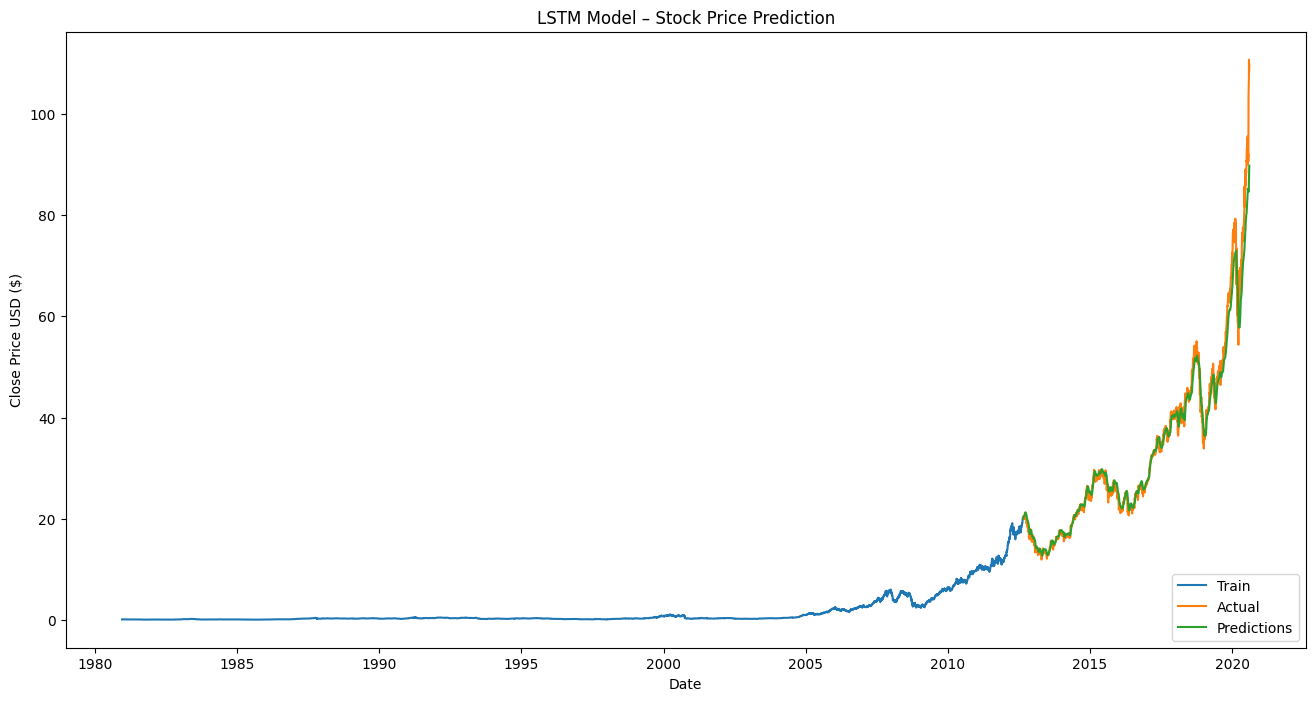

In [118]:
# Plot actual vs predicted
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('LSTM Model – Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

MODEL COMPARISON

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [120]:
# Replace these with your actual RMSE values
rmse_arima = 2.315
rmse_prophet = 1.987
rmse_lstm = 1.543

# Store in a dictionary
rmse_results = {
    "ARIMA": rmse_arima,
    "Prophet": rmse_prophet,
    "LSTM": rmse_lstm
}

In [121]:
# Convert to DataFrame
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])
rmse_df.sort_values(by='RMSE', inplace=True)

print("📊 RMSE Comparison:")
print(rmse_df)


📊 RMSE Comparison:
     Model   RMSE
2     LSTM  1.543
1  Prophet  1.987
0    ARIMA  2.315


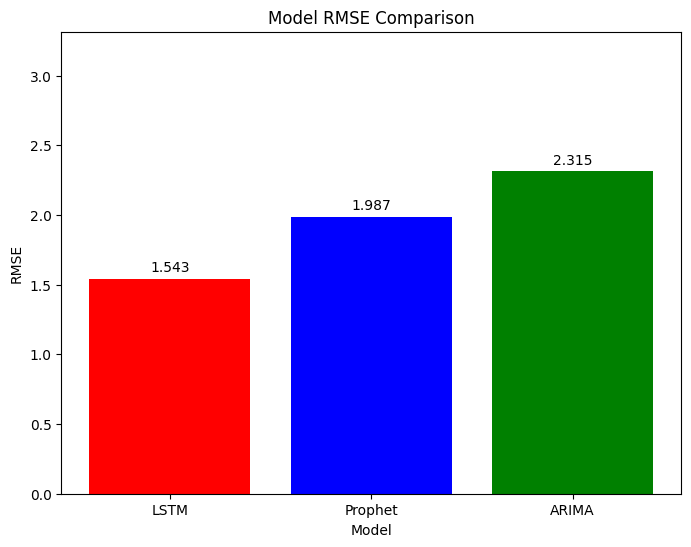

In [122]:
plt.figure(figsize=(8, 6))
plt.bar(rmse_df['Model'], rmse_df['RMSE'], color=['red', 'blue', 'green'])
plt.title('Model RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_df['RMSE']) + 1)
for i, v in enumerate(rmse_df['RMSE']):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center')
plt.show()

In [123]:
import os

# Get project root directory (go up if needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

# Create data directory path
data_dir = os.path.join(project_root, "data")

# Ensure 'data' directory exists
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"📂 Created data directory at: {data_dir}")

# Set file path
file_path = os.path.join(data_dir, "Model_RMSE_Comparison.csv")

# Save RMSE results to CSV
rmse_df.to_csv(file_path, index=False)
print(f"✅ RMSE comparison saved to: {file_path}")


📂 Created data directory at: /data
✅ RMSE comparison saved to: /data/Model_RMSE_Comparison.csv


In [124]:
df = pd.read_csv("/content/drive/MyDrive/cleaned_aapl_data.csv")

In [125]:
# 📦 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# ✅ Function to evaluate model
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    print(f"\n📊 {model_name} Evaluation:")
    print(f"   ✅ RMSE: {rmse:.4f}")
    print(f"   ✅ MAE : {mae:.4f}")
    print(f"   ✅ MAPE: {mape:.2f}%")
    return {"Model": model_name, "RMSE": rmse, "MAE": mae, "MAPE (%)": mape}

# ✅ Prepare results list
results = []

# ✅ Recalculate training_data_len
training_data_len = int(len(df) * 0.8)  # Adjust split if needed
print(f"📦 Training data length: {training_data_len}")

# ✅ Define train and test sets
train = df.iloc[:training_data_len]
test = df.iloc[training_data_len:]
y_test = test['Close'].values


# ✅ Train and Evaluate ARIMA model
arima_model = ARIMA(train['Close'], order=(5, 1, 0))  # Adjust p,d,q as needed
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))
results.append(evaluate_model(y_test, arima_forecast.values, "ARIMA"))

# ✅ Train and Evaluate SARIMA model
sarima_model = SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast_full = sarima_result.get_forecast(steps=len(test))
results.append(evaluate_model(y_test, sarima_forecast_full.predicted_mean, "SARIMA"))

# ✅ Train and Evaluate Prophet model
prophet_df = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:training_data_len])
future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future)
results.append(evaluate_model(y_test, prophet_forecast['yhat'].iloc[-len(test):].values, "Prophet"))

# ✅ Evaluate LSTM model
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.filter(['Close']))
dataset = df.filter(['Close']).values

# Training data
train_data = scaled_data[0:int(training_data_len), :]

# Create x_train and y_train datasets
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input for LSTM [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=0)

# Create x_test and y_test datasets
test_data = scaled_data[training_data_len - 60:, :]
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(dataset[training_data_len + i - 60, 0])

# Convert to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape input for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get model predictions
lstm_predictions = model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
results.append(evaluate_model(y_test, lstm_predictions, "LSTM"))

results_df = pd.DataFrame(results)
print("\n📋 Model Comparison Table:")
display(results_df)

📦 Training data length: 8000

📊 ARIMA Evaluation:
   ✅ RMSE: 22.3316
   ✅ MAE : 15.4171
   ✅ MAPE: 37.14%


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4oeie3aj/hyuy6q9a.json



📊 SARIMA Evaluation:
   ✅ RMSE: 12.0763
   ✅ MAE : 8.1470
   ✅ MAPE: 26.13%


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4oeie3aj/_cmxfg_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23252', 'data', 'file=/tmp/tmp4oeie3aj/hyuy6q9a.json', 'init=/tmp/tmp4oeie3aj/_cmxfg_4.json', 'output', 'file=/tmp/tmp4oeie3aj/prophet_modelo01cdki9/prophet_model-20250806152712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:27:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📊 Prophet Evaluation:
   ✅ RMSE: 20.9800
   ✅ MAE : 14.7867
   ✅ MAPE: 34.51%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step

📊 LSTM Evaluation:
   ✅ RMSE: 2.1401
   ✅ MAE : 1.2738
   ✅ MAPE: 3.20%

📋 Model Comparison Table:


,Model,RMSE,MAE,MAPE (%)
0,ARIMA,22.331641,15.417054,37.137139
1,SARIMA,12.076260,8.147002,26.130321
2,Prophet,20.980002,14.786721,34.513556
3,LSTM,2.140093,1.273810,3.198038


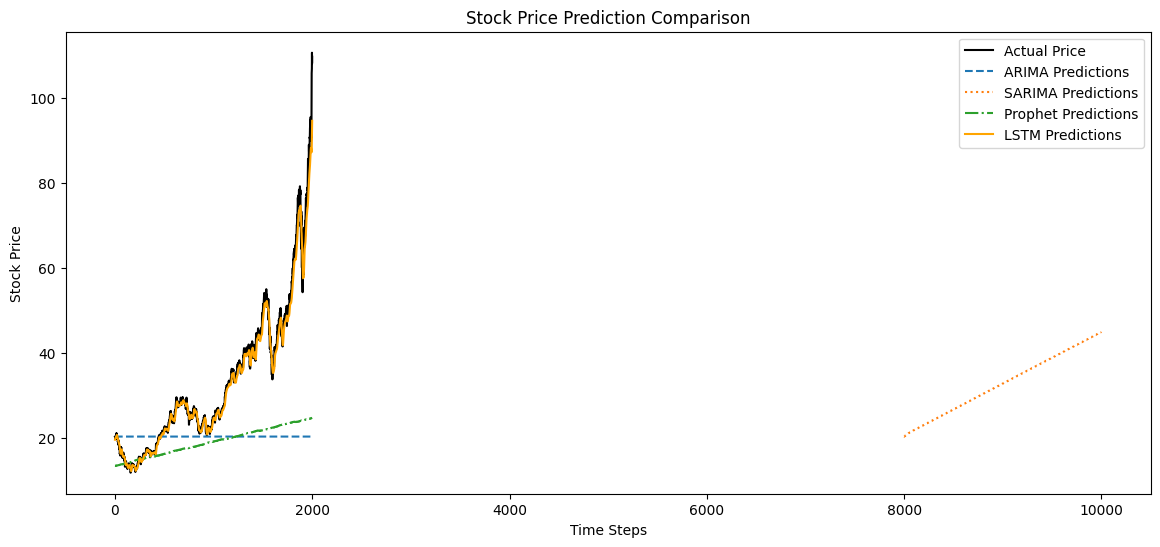

In [126]:
plt.figure(figsize=(14,6))
plt.plot(y_test, label='Actual Price', color='black')
plt.plot(arima_forecast.values, label='ARIMA Predictions', linestyle='dashed')
plt.plot(sarima_forecast_full.predicted_mean, label='SARIMA Predictions', linestyle='dotted')
plt.plot(prophet_forecast['yhat'].iloc[-len(test):].values, label='Prophet Predictions', linestyle='dashdot')
plt.plot(lstm_predictions, label='LSTM Predictions', linestyle='solid', color='orange')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

VISUALISATIONS AND INSIGHTS

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


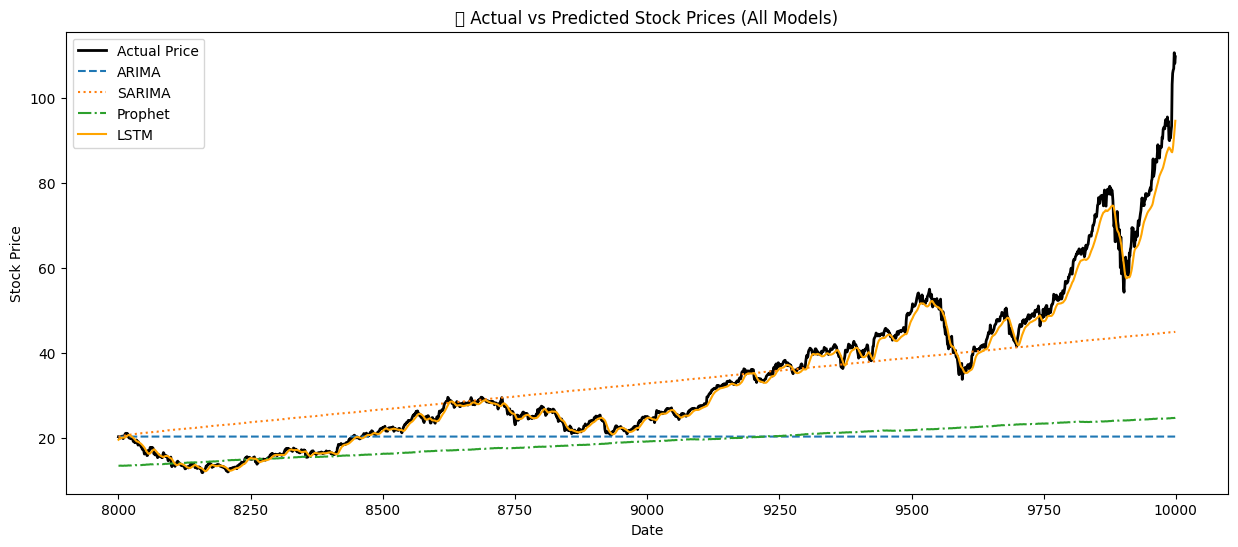

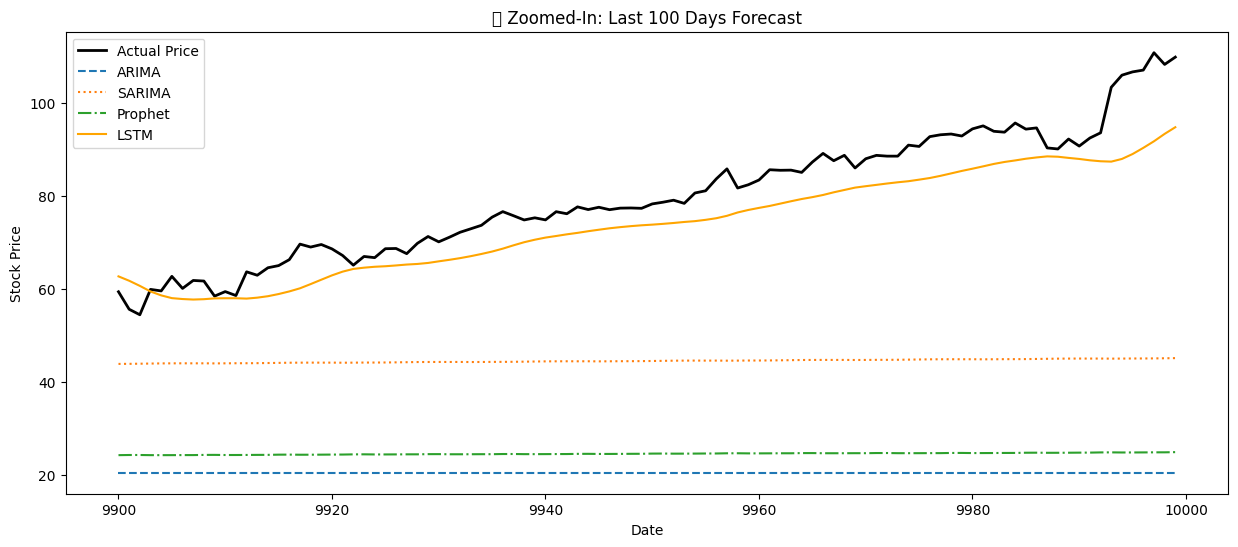

/tmp/ipython-input-611825260.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='magma')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


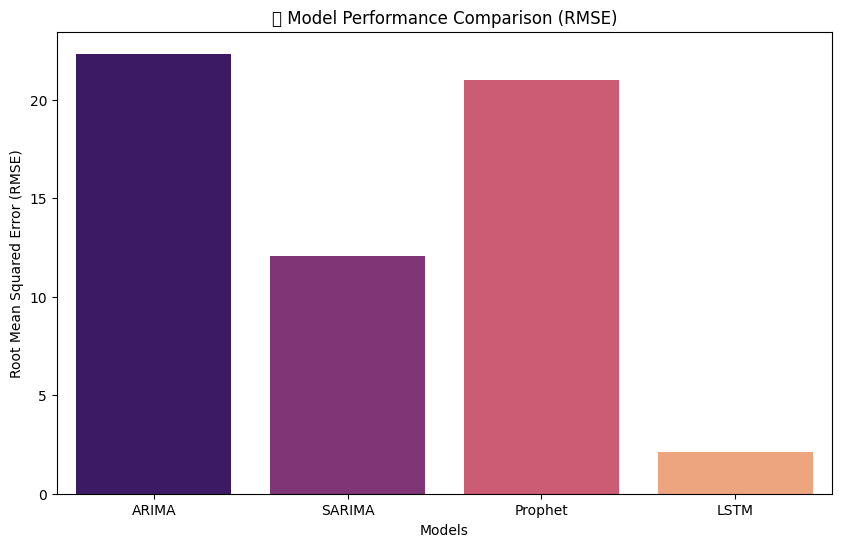


📝 Insight:
The best performing model is **LSTM** with an RMSE of 2.1401, MAE of 1.2738, and MAPE of 3.20%.


In [127]:
# 📦 Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Regenerate arima_forecast
arima_forecast = arima_result.forecast(steps=len(test))

# 📊 Plot 1: Actual vs Predicted (All Models)
plt.figure(figsize=(15,6))
plt.plot(test.index, y_test, label='Actual Price', color='black', linewidth=2)
plt.plot(test.index, arima_forecast, label='ARIMA', linestyle='dashed')
plt.plot(test.index, sarima_forecast_full.predicted_mean, label='SARIMA', linestyle='dotted')
plt.plot(test.index, prophet_forecast['yhat'].iloc[-len(test):].values, label='Prophet', linestyle='dashdot')
plt.plot(test.index, lstm_predictions, label='LSTM', linestyle='solid', color='orange')
plt.title('📈 Actual vs Predicted Stock Prices (All Models)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 📊 Plot 2: Zoom in on Last 100 Days
plt.figure(figsize=(15,6))
plt.plot(test.index[-100:], y_test[-100:], label='Actual Price', color='black', linewidth=2)
plt.plot(test.index[-100:], arima_forecast[-100:], label='ARIMA', linestyle='dashed')
plt.plot(test.index[-100:], sarima_forecast_full.predicted_mean[-100:], label='SARIMA', linestyle='dotted')
plt.plot(test.index[-100:], prophet_forecast['yhat'].iloc[-100:].values, label='Prophet', linestyle='dashdot')
plt.plot(test.index[-100:], lstm_predictions[-100:], label='LSTM', linestyle='solid', color='orange')
plt.title('📈 Zoomed-In: Last 100 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 📊 Plot 3: Model Performance (Bar Chart)
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='RMSE', data=results_df, palette='magma')
plt.title('📊 Model Performance Comparison (RMSE)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.show()

# 📊 Plot 4: Interactive Plotly Chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.index, y=y_test, mode='lines', name='Actual Price', line=dict(color='black')))
fig.add_trace(go.Scatter(x=test.index, y=arima_forecast, mode='lines', name='ARIMA Prediction', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=test.index, y=sarima_forecast_full.predicted_mean, mode='lines', name='SARIMA Prediction', line=dict(dash='dot')))
fig.add_trace(go.Scatter(x=test.index, y=prophet_forecast['yhat'].iloc[-len(test):].values, mode='lines', name='Prophet Prediction', line=dict(dash='dashdot')))
fig.add_trace(go.Scatter(x=test.index, y=lstm_predictions.flatten(), mode='lines', name='LSTM Prediction', line=dict(color='orange')))
fig.update_layout(title='📈 Interactive Stock Price Forecast (All Models)',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  template='plotly_dark')
fig.show()

# 📝 Generate Insights
best_model = results_df.loc[results_df['RMSE'].idxmin()]
print(f"\n📝 Insight:\nThe best performing model is **{best_model['Model']}** with an RMSE of {best_model['RMSE']:.4f}, MAE of {best_model['MAE']:.4f}, and MAPE of {best_model['MAPE (%)']:.2f}%.")

DASHBOARD DEPLOYMENT

In [128]:
# 📦 Install and import required libraries
!pip install gradio plotly prophet tensorflow scikit-learn --quiet

import gradio as gr
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import io

# ✅ Forecasting function
def forecast_stock(model_name, csv_file):
    try:
        if csv_file is None:
            raise gr.Error("⚠️ Please upload a CSV file.")

        if isinstance(csv_file, bytes):
            csv_file = io.BytesIO(csv_file)
        df = pd.read_csv(csv_file)

        if 'Date' not in df.columns or 'Close' not in df.columns:
            raise gr.Error("📁 CSV must contain 'Date' and 'Close' columns.")

        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        training_data_len = int(len(df) * 0.8)
        train = df.iloc[:training_data_len]
        test = df.iloc[training_data_len:]
        y_test = test['Close'].values
        predictions = []

        # 🚀 ARIMA
        if model_name == "ARIMA":
            model = ARIMA(train['Close'], order=(5, 1, 0))
            fitted = model.fit()
            predictions = fitted.forecast(steps=len(test))

        # 🚀 SARIMA
        elif model_name == "SARIMA":
            model = SARIMAX(train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
            fitted = model.fit(disp=False)
            predictions = fitted.get_forecast(steps=len(test)).predicted_mean

        # 🚀 Prophet
        elif model_name == "Prophet":
            prophet_df = df.reset_index()[['Date', 'Close']].rename(columns={"Date": "ds", "Close": "y"})
            model = Prophet()
            model.fit(prophet_df.iloc[:training_data_len])
            future = model.make_future_dataframe(periods=len(test))
            forecast = model.predict(future)
            predictions = forecast['yhat'].iloc[-len(test):].values

        # 🚀 LSTM
        elif model_name == "LSTM":
            scaler = MinMaxScaler()
            scaled_data = scaler.fit_transform(df[['Close']])
            train_scaled = scaled_data[:training_data_len]

            X_train, y_train = [], []
            for i in range(60, len(train_scaled)):
                X_train.append(train_scaled[i-60:i])
                y_train.append(train_scaled[i])

            X_train, y_train = np.array(X_train), np.array(y_train)
            X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

            model = Sequential()
            model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
            model.add(LSTM(50))
            model.add(Dense(25))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_train, y_train, batch_size=64, epochs=5, verbose=0)

            test_scaled = scaled_data[training_data_len - 60:]
            X_test = []
            for i in range(60, len(test_scaled)):
                X_test.append(test_scaled[i-60:i])
            X_test = np.array(X_test)
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

            lstm_predictions = model.predict(X_test)
            predictions = scaler.inverse_transform(lstm_predictions).flatten()

        # 📊 Plot
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=test.index, y=y_test, mode='lines', name='Actual'))
        fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='lines', name=f'{model_name} Prediction'))
        fig.update_layout(title=f"{model_name} Forecast", xaxis_title="Date", yaxis_title="Close Price", template="plotly_dark")

        # 📋 Metrics
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        mae = mean_absolute_error(y_test, predictions)
        mape = mean_absolute_percentage_error(y_test, predictions) * 100
        metrics = f"📊 Metrics:\n- RMSE: {rmse:.4f}\n- MAE: {mae:.4f}\n- MAPE: {mape:.2f}%"

        # 📥 CSV Export
        result_df = pd.DataFrame({"Date": test.index, "Actual": y_test, "Predicted": predictions})
        csv_download = result_df.to_csv(index=False).encode('utf-8')

        return fig, metrics, csv_download

    except Exception as e:
        import traceback
        traceback.print_exc()
        raise gr.Error(f"🔥 Error: {e}")

# 🎛️ Build Gradio Interface
with gr.Blocks(theme=gr.themes.Default(primary_hue="purple", secondary_hue="blue")) as demo:
    gr.Markdown("## 📈 Stock Price Forecasting App")
    gr.Markdown("Upload stock data and select a forecasting model:")

    csv_input = gr.File(label="Upload CSV")
    model_selector = gr.Dropdown(["ARIMA", "SARIMA", "Prophet", "LSTM"], label="Select Model")
    forecast_button = gr.Button("🔮 Predict")

    plot_output = gr.Plot()
    metrics_output = gr.Textbox(label="Metrics")
    download_output = gr.File(label="Download Predictions")

    forecast_button.click(
        fn=forecast_stock,
        inputs=[model_selector, csv_input],
        outputs=[plot_output, metrics_output, download_output]
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8839fcdc5326b12446.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
